In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('new_fpkm_threshold.csv', header=0, index_col = 0)
df.head()

,Autism,HSBP1,CAP1,ZFHX4-AS1,FBXL7,PMPCA,PHF12,MGST3,LOC283070,PPP1R12B,...,UBE2T,PTK7,EIF2B3,CDK16,C15orf61,GSTP1,IPP,ASB3,EHD4,NRSN2
PGP1-1,0,84.510038,25.546087,3.243708,5.533667,16.558363,6.716821,36.765727,3.525942,2.870405,...,36.320081,23.422699,6.506580,7.639236,1.808342,253.147425,2.624415,5.473228,9.892221,14.017985
PGP1-2,0,75.044515,20.451054,3.015391,6.885036,12.673928,5.882669,27.229725,2.658576,2.758019,...,19.707959,12.679506,6.687741,7.457054,1.614225,290.182382,3.276070,7.483068,7.377414,11.613564
PGP1-3,0,100.825429,24.200828,1.594495,1.653018,12.994339,5.947767,46.156174,5.883554,3.761642,...,15.002978,9.314311,6.744241,36.158595,3.626686,118.126815,2.221963,5.087976,2.392554,15.666102
GM23716-1,0,92.587682,22.887937,2.100904,1.835257,11.945566,5.041255,40.480850,6.950511,3.762403,...,13.609106,9.826147,6.570986,32.786094,3.988325,103.634970,2.459700,4.626596,2.301205,16.500382
GM23716-2,0,77.996502,22.323798,1.744930,1.764977,12.519729,6.163550,38.602007,6.977038,3.790913,...,13.346974,4.147004,5.990253,55.245293,3.849378,111.978695,2.494851,4.843815,2.285043,18.534124


In [7]:
y = df.Autism
x = df.iloc[:,1:]

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=0)

Model Accuracy: 70.83333333333334


[Text(148.8, 190.26, 'X[2429] <= 5.165\ngini = 0.604\nsamples = 47\nvalue = [25, 9, 13]'),
 Text(74.4, 135.9, 'X[5106] <= 1.97\ngini = 0.133\nsamples = 14\nvalue = [0, 1, 13]'),
 Text(37.2, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13]'),
 Text(223.20000000000002, 135.9, 'X[7878] <= 2.089\ngini = 0.367\nsamples = 33\nvalue = [25, 8, 0]'),
 Text(186.0, 81.53999999999999, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(260.40000000000003, 81.53999999999999, 'X[3628] <= 1.777\ngini = 0.137\nsamples = 27\nvalue = [25, 2, 0]'),
 Text(223.20000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(297.6, 27.180000000000007, 'gini = 0.0\nsamples = 25\nvalue = [25, 0, 0]')]

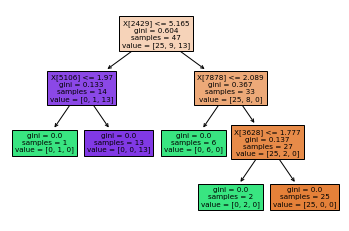

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)
tree_prediction = tree.predict(x_test)

tree_accuracy = accuracy_score(y_test, tree_prediction)
print('Model Accuracy: {}'.format(tree_accuracy*100))
plot_tree(tree,filled=True)

Model Accuracy: 70.83333333333334


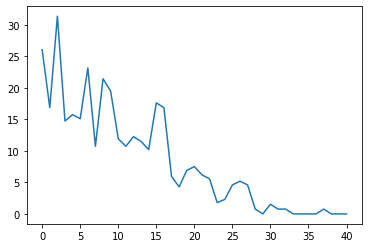

In [11]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(alpha=0.001,max_iter=100000000)
nn.fit(x_train,y_train)
nn_prediction= nn.predict(x_test)

nn_accuracy = accuracy_score(y_test, nn_prediction.round())

print('Model Accuracy: {}'.format(nn_accuracy*100))
plt.plot(nn.loss_curve_)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(x_train, y_train)
rf_prediction = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_prediction.round())
print('Model Accuracy: {}'.format(rf_accuracy*100))

Model Accuracy: 79.16666666666666


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_prediction = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_prediction.round())
print('Model Accuracy: {}'.format(knn_accuracy*100))

Model Accuracy: 54.166666666666664
